## Deep Learning and TS analysis
https://blog.devgenius.io/amazon-stock-analysis-in-python-with-yahoo-finance-12a80088a1f0

In [85]:
#!pip install yfinance
#!pip install keras
#!pip install tensorflow

In [87]:
# libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=200) # 365
d1 = d2.strftime("%Y-%m-%d")
start_date = d2
print(start_date, end_date, today)

2022-09-05 2023-03-24 2023-03-24


In [41]:
data = yf.download('AMZN', start=start_date,  end=end_date,  progress=False)
data.shape

(138, 6)

In [42]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [43]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-06  127.919998  128.619995  124.739998  126.110001  126.110001   
2022-09-07  126.120003  129.820007  125.400002  129.479996  129.479996   
2022-09-08  127.720001  130.279999  127.099998  129.820007  129.820007   
2022-09-09  130.910004  133.690002  130.759995  133.270004  133.270004   
2022-09-12  134.100006  136.490005  134.000000  136.449997  136.449997   

              Volume  
Date                  
2022-09-06  43888600  
2022-09-07  47900300  
2022-09-08  43988500  
2022-09-09  49387600  
2022-09-12  53826900

In [44]:
data2 = data.reset_index()

In [45]:
figure = go.Figure(data=[go.Candlestick(x=data2['Date'],  open=data["Open"], high=data["High"], low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Amazon Stock Price Analysis", xaxis_rangeslider_visible = False)
figure.show();

In [46]:
figure = px.bar(data2, x="Date", y="Close")
figure.show();

In [47]:
figure = px.line(data2, x='Date', y='Close',  title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show();

In [48]:
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show();

In [49]:
figure = px.scatter(data2, x='Date', y='Close', range_x=['2022-07-12', '2022-09-11'], title="Stock Market Analysis by Hiding Weekend Gaps")
figure.update_xaxes( rangebreaks=[dict(bounds=["sat", "sun"])])
figure.show();

In [50]:
data2.duplicated().sum()

0

In [51]:
data2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       138 non-null    datetime64[ns]
 1   Open       138 non-null    float64       
 2   High       138 non-null    float64       
 3   Low        138 non-null    float64       
 4   Close      138 non-null    float64       
 5   Adj Close  138 non-null    float64       
 6   Volume     138 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.7 KB


In [53]:
data2.describe()

Open        High         Low       Close   Adj Close  \
count  138.000000  138.000000  138.000000  138.000000  138.000000   
mean   101.068116  102.779420   99.251956  101.062247  101.062247   
std     12.553694   12.845084   12.470578   12.723944   12.723944   
min     82.800003   83.480003   81.430000   81.820000   81.820000   
25%     92.687498   94.230000   90.885002   92.422499   92.422499   
50%     97.285000   98.485001   95.630001   97.189999   97.189999   
75%    112.654999  114.172503  110.009996  112.807501  112.807501   
max    134.100006  136.490005  134.000000  136.449997  136.449997   

             Volume  
count  1.380000e+02  
mean   7.300839e+07  
std    2.864395e+07  
min    3.508860e+07  
25%    5.571242e+07  
50%    6.606735e+07  
75%    8.181672e+07  
max    2.231334e+08

In [54]:
data2.nunique()

Date         138
Open         132
High         137
Low          136
Close        137
Adj Close    137
Volume       138
dtype: int64

In [55]:
data3 = data2.drop(columns=['Adj Close'])
data3.head()

Date        Open        High         Low       Close    Volume
0 2022-09-06  127.919998  128.619995  124.739998  126.110001  43888600
1 2022-09-07  126.120003  129.820007  125.400002  129.479996  47900300
2 2022-09-08  127.720001  130.279999  127.099998  129.820007  43988500
3 2022-09-09  130.910004  133.690002  130.759995  133.270004  49387600
4 2022-09-12  134.100006  136.490005  134.000000  136.449997  53826900

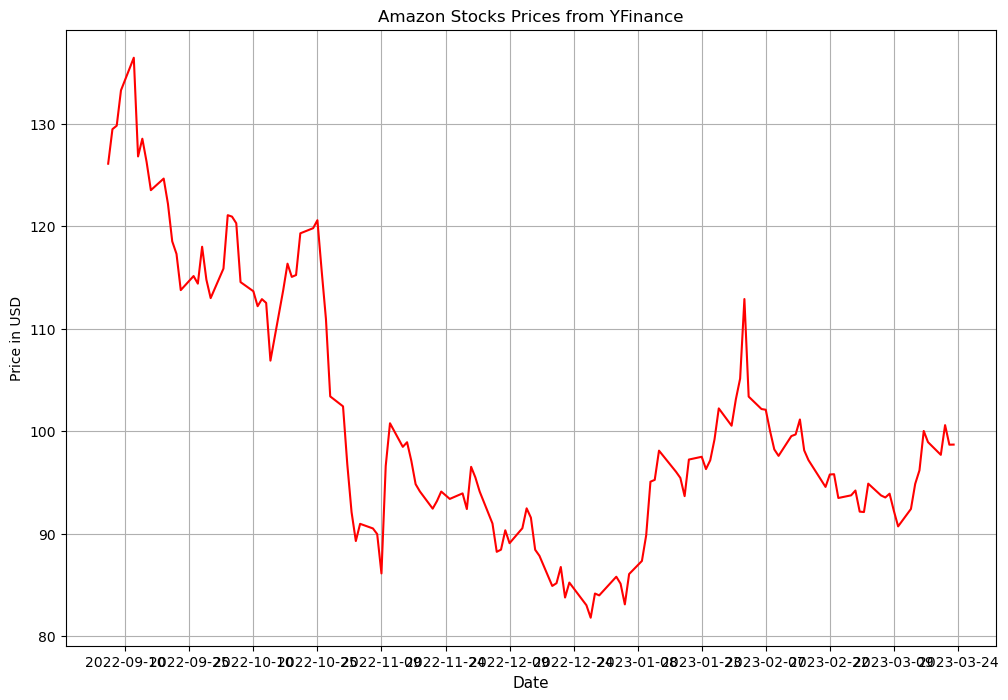

In [57]:
#plot
fig, ax = plt.subplots(figsize = (12,8))
ax.plot(data3['Date'], data3['Close'], color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date', fontsize='11')
ax.set_ylabel('Price in USD', fontsize=10)
plt.title('Amazon Stocks Prices from YFinance')
plt.grid()
plt.show();

### do same for Close, Volumne, 
https://algotrading101.com/learn/yfinance-guide/

In [62]:
dTicker = yf.Ticker('AMZN')
dTicker

yfinance.Ticker object <AMZN>

In [73]:
dataMon1 = dTicker.history(start="2023-03-10", end="2023-03-23", interval="60m")

In [74]:
dataMon1

Open        High         Low       Close  \
Datetime                                                                    
2023-03-10 09:30:00-05:00   92.669998   92.800003   90.800003   91.855003   
2023-03-10 10:30:00-05:00   91.853203   93.309998   91.730003   93.159897   
2023-03-10 11:30:00-05:00   93.154999   93.570000   91.820000   91.999901   
2023-03-10 12:30:00-05:00   92.000000   92.242996   90.779999   90.813202   
2023-03-10 13:30:00-05:00   90.809998   91.489998   90.745003   90.889999   
...                               ...         ...         ...         ...   
2023-03-22 11:30:00-04:00  100.459900  100.739998   99.779999   99.946999   
2023-03-22 12:30:00-04:00   99.940102  100.216599   99.832199  100.193604   
2023-03-22 13:30:00-04:00  100.195198  101.930000  100.139999  101.212502   
2023-03-22 14:30:00-04:00  101.220001  102.099998   99.764900  101.059998   
2023-03-22 15:30:00-04:00  101.070000  101.150803   98.610001   98.699997   

                             Volume  Dividends  Stock Splits  
Datetime                                                      
2023-03-10 09:30:00-05:00  16559937        0.0           0.0  
2023-03-10 10:30:00-05:00   9216419        0.0           0.0  
2023-03-10 11:30:00-05:00   7237232        0.0           0.0  
2023-03-10 12:30:00-05:00   6975035        0.0           0.0  
2023-03-10 13:30:00-05:00   7149071        0.0           0.0  
...                             ...        ...           ...  
2023-03-22 11:30:00-04:00   4607469        0.0           0.0  
2023-03-22 12:30:00-04:00   3250304        0.0           0.0  
2023-03-22 13:30:00-04:00   9582695        0.0           0.0  
2023-03-22 14:30:00-04:00  13170538        0.0           0.0  
2023-03-22 15:30:00-04:00   7752242        0.0           0.0  

[63 rows x 7 columns]

In [75]:
## Get closing prices
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-06  127.919998  128.619995  124.739998  126.110001  126.110001   
2022-09-07  126.120003  129.820007  125.400002  129.479996  129.479996   
2022-09-08  127.720001  130.279999  127.099998  129.820007  129.820007   
2022-09-09  130.910004  133.690002  130.759995  133.270004  133.270004   
2022-09-12  134.100006  136.490005  134.000000  136.449997  136.449997   

              Volume  
Date                  
2022-09-06  43888600  
2022-09-07  47900300  
2022-09-08  43988500  
2022-09-09  49387600  
2022-09-12  53826900

In [76]:
data2.head()

Date        Open        High         Low       Close   Adj Close  \
0 2022-09-06  127.919998  128.619995  124.739998  126.110001  126.110001   
1 2022-09-07  126.120003  129.820007  125.400002  129.479996  129.479996   
2 2022-09-08  127.720001  130.279999  127.099998  129.820007  129.820007   
3 2022-09-09  130.910004  133.690002  130.759995  133.270004  133.270004   
4 2022-09-12  134.100006  136.490005  134.000000  136.449997  136.449997   

     Volume  
0  43888600  
1  47900300  
2  43988500  
3  49387600  
4  53826900

#not working
#from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
from keras.layers import Dense, LSTM
#import math

In [84]:
data4 = data2.set_index('Date')

In [82]:
data4.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-09-06  127.919998  128.619995  124.739998  126.110001  126.110001   
2022-09-07  126.120003  129.820007  125.400002  129.479996  129.479996   
2022-09-08  127.720001  130.279999  127.099998  129.820007  129.820007   
2022-09-09  130.910004  133.690002  130.759995  133.270004  133.270004   
2022-09-12  134.100006  136.490005  134.000000  136.449997  136.449997   

              Volume  
Date                  
2022-09-06  43888600  
2022-09-07  47900300  
2022-09-08  43988500  
2022-09-09  49387600  
2022-09-12  53826900

In [ ]:
data6 = data4.filter(['Close'])
dataV - data6.values
train_data_len = math.ceil(len(dataV) * .8)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler_fit_transform(dataV)
scaled_data